In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

df = pd.read_csv('C:\\Users\\koti\\Transcation_category\\cards_data.csv')
print(df.shape)
from pandas_profiling import ProfileReport
#ProfileReport(df)

(52744, 29)


<AxesSubplot:>

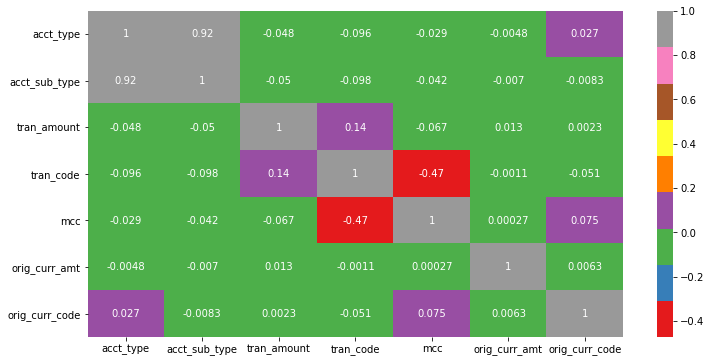

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cor = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

In [4]:
df.columns

Index(['as_of_date', 'ACCT_ID', 'acct_type', 'acct_sub_type', 'card_acct',
       'card_nbr', 'tran_date', 'tran_curr_code', 'tran_amount', 'tran_code',
       'tran_direction', 'merchant_id', 'merch_desc', 'mcc', 'orig_curr_amt',
       'orig_curr_code', 'country_code', 'contactless_ind', 'online_ind',
       'tran_ref', 'posting_date', 'row_key_value', 'BILL_CORP_SNAME',
       'BILLER_REFERENCE', 'BILL_CORP_CODE', 'BILLER_NAME', 'ACCT_ID_CASA',
       'transactionId', 'category'],
      dtype='object')

In [5]:
df = df.fillna('-999')

In [6]:
df = df.drop(['acct_type','merchant_id','as_of_date','posting_date'],axis=1)
df.shape

(52744, 25)

In [9]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

X_tr, X_eval = train_test_split(df, test_size=0.3)


y_tr = X_tr.category
y_eval = X_eval.category

X_tr = X_tr.drop(columns=['category'])
X_eval = X_eval.drop(columns=['category'])

features = [col_name for col_name in X_tr.columns if col_name != 'category']
cat_features = [col_name for col_name in features if X_tr[col_name].dtype == 'object']


train_dataset = Pool(X_tr, y_tr, feature_names=list(X_tr.columns), cat_features=cat_features)

model_params = {
    'iterations': 20, 
    'loss_function': 'MultiClass', 
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
    'learning_rate': 0.01
}

model = CatBoostClassifier(**model_params)
model.fit(train_dataset, verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 3.0649232	total: 6.69s	remaining: 2m 7s
1:	learn: 2.9406134	total: 12.6s	remaining: 1m 53s
2:	learn: 2.8325240	total: 18.4s	remaining: 1m 44s
3:	learn: 2.7385848	total: 24.3s	remaining: 1m 37s
4:	learn: 2.6558732	total: 30.2s	remaining: 1m 30s
5:	learn: 2.5821709	total: 36.2s	remaining: 1m 24s
6:	learn: 2.5141325	total: 42.1s	remaining: 1m 18s
7:	learn: 2.4525853	total: 47.9s	remaining: 1m 11s
8:	learn: 2.3936054	total: 53.8s	remaining: 1m 5s
9:	learn: 2.3400951	total: 59.6s	remaining: 59.6s
10:	learn: 2.2905847	total: 1m 5s	remaining: 53.5s
11:	learn: 2.2444630	total: 1m 11s	remaining: 47.7s
12:	learn: 2.2003892	total: 1m 17s	remaining: 41.7s
13:	learn: 2.1569527	total: 1m 23s	remaining: 35.7s
14:	learn: 2.1195336	total: 1m 29s	remaining: 29.7s
15:	learn: 2.0831424	total: 1m 35s	remaining: 23.8s
16:	learn: 2.0459348	total: 1m 40s	remaining: 17.8s
17:	learn: 2.0107466	total: 1m 46s	remaining: 11.9s
18:	learn: 1.9770831	total: 1m 52s	remaining: 5.93s
19:	learn: 1.9477276	total

In [8]:
!pip install catboost

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve,classification_report
predict = model.predict(X_eval)
print('Test data f1 score',classification_report(y_eval,predict))

C:\Users\koti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test data f1 score                                 precision    recall  f1-score   support

               Cash Withdrawal       0.00      0.00      0.00         4
                Digital Wallet       1.00      0.11      0.20         9
                        Dining       0.75      0.98      0.85      1378
                     Donations       0.00      0.00      0.00        10
                     Education       0.00      0.00      0.00        77
                 Entertainment       0.98      0.95      0.97      4025
          Fees & Other charges       0.00      0.00      0.00        41
                     Groceries       0.50      0.75      0.60       552
              Health & Fitness       0.00      0.00      0.00       210
                     Household       0.00      0.00      0.00        60
                     Insurance       0.00      0.00      0.00        26
                 Kids & Family       0.00      0.00      0.00        25
               Loan & Mortgage       0.00   

In [11]:
df_test = pd.read_csv('/kaggle/input/cardsdata/cards_data_test.csv')
print(df_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cardsdata/cards_data_test.csv'

In [ ]:
df_test = df_test.fillna('-999')
df_test = df_test.drop(['acct_type','merchant_id','as_of_date','posting_date'],axis=1)

X_test = df_test.drop(columns=['category'])
X_label = df_test.category

In [ ]:
predict_test = model.predict(X_test)
print('Test data metric scores',classification_report(X_label,predict_test))